Lab1: Complete the TODO parts in the following code. 
- Using California Housing Dataset from sklearn, select input attributes 1,3,4  as the input features. 
- Using K-fold cross validation technique (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), complete the implementation to train a regression model and report performance merics when asked in the following code. 
- For multiple degrees of model complexity (i.e., degree of polynomial in this exercise) in a for-loop, obtain the model with the minimum reducible_error, polynomial degree, and run the obtained model on the test data. For this part,you should use the split the data into train and test by [75:25] rate and report mse of the final model on test data. 
- Analyse the results of model performance according to different degrees of polynomial and the number of folds used. You can manipulate the code and share your analysis in terms of the performance of the model (mse and total error), such as for instnace which degree of the model complexity (in relation to the polynomial order) would give a better model? Feel free to include other analysis about the generated models in relation to their performance results. You can event plot the results to support your analysis. 

In [2]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing


def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    variance = []
    bias2 = []
    total_error = []
    models = []

    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate variance and Bias^2 for this fold
        b2 = np.mean((np.mean(y_pred) - y_test)**2)
        var = np.mean((np.mean(y_pred) - y_pred)**2)
        total_err = b2 + var
        # Append results to lists
        variance.append(var)
        bias2.append(b2)
        total_error.append(total_err)
        models.append(model)

        # Print results  including variance, Bias^2 and the total_error for this fold. 
        print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(var, b2, total_err))

    # print the total_error of the best model
    min_error_index = np.argmin(total_error)
    best_model = models[min_error_index]
    print("The total error of the best model is: {:.4f}".format(total_error[min_error_index]))

    
    # Testing the final model on the test data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=42)
    # Obtain the predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_pred)
    

    return mse , best_model


# Example usage: load California Housing Dataset and select the first, third, and forth attributes as input features in X
housing = fetch_california_housing()
target = housing.target
X = housing.data[:, [1, 3, 4]]
# Set the target valiable 

# degrees = range(1, 10) # for testing 
degrees = range(1, 6)  # Try polynomial degrees from 1 to 5
# Try degrees from 1 to 5 and in a loop, report mse of the best model trained using k-fold cross validation and print("Degree:", degree, "MSE:", mse)
for degree in degrees:
    mse, best_model = polynomial_regression(degree, X, target, 5)
    print("Degree:", degree, "MSE:", mse)


Variance: 0.0412, Bias2: 1.3112, Total error: 1.3524
Variance: 0.0088, Bias2: 1.1757, Total error: 1.1845
Variance: 0.0186, Bias2: 1.6176, Total error: 1.6362
Variance: 0.0078, Bias2: 1.2539, Total error: 1.2617
Variance: 0.0144, Bias2: 1.5311, Total error: 1.5455
The total error of the best model is: 1.1845
Degree: 1 MSE: 1.3042670419213096
Variance: 0.0593, Bias2: 1.3233, Total error: 1.3827
Variance: 0.0267, Bias2: 1.1753, Total error: 1.2020
Variance: 0.0287, Bias2: 1.6266, Total error: 1.6553
Variance: 0.0319, Bias2: 1.2559, Total error: 1.2878
Variance: 0.0229, Bias2: 1.5353, Total error: 1.5582
The total error of the best model is: 1.2020
Degree: 2 MSE: 1.2992555791229554
Variance: 1.3813, Bias2: 1.3039, Total error: 2.6852
Variance: 0.0357, Bias2: 1.1765, Total error: 1.2122
Variance: 0.0388, Bias2: 1.6263, Total error: 1.6651
Variance: 0.0423, Bias2: 1.2547, Total error: 1.2969
Variance: 0.0248, Bias2: 1.5294, Total error: 1.5542
The total error of the best model is: 1.2122
De

- In the above test, the 4th degree produces the lowest MES which indicates it is the closest to the predict value. However, the best model occures in the 1st degree. 
- The total error of the best model increases as the degree increases. 
- In the above test, we know with 1st degree : best model, 4th degee: stable model 

Degree:  1
The total error of the best model is: 1.1845
Fold: 5 ;  MSE: 1.3042670419213096
The total error of the best model is: 0.7723
Fold: 10 ;  MSE: 1.304514279214312
The total error of the best model is: 0.0000
Fold: 20640 ;  MSE: 1.3044044525186174

Degree:  2
The total error of the best model is: 1.2020
Fold: 5 ;  MSE: 1.2992555791229554
The total error of the best model is: 0.7793
Fold: 10 ;  MSE: 1.2975253475210153
The total error of the best model is: 0.0000
Fold: 20640 ;  MSE: 1.2975934197277965

Degree:  3
The total error of the best model is: 1.2122
Fold: 5 ;  MSE: 1.2933074103585973
The total error of the best model is: 0.7797
Fold: 10 ;  MSE: 1.291429881128279
The total error of the best model is: 0.0000
Fold: 20640 ;  MSE: 1.2915112291010076

Degree:  4
The total error of the best model is: 1.2199
Fold: 5 ;  MSE: 1.2869639077357107
The total error of the best model is: 0.7786
Fold: 10 ;  MSE: 1.2871305687705734
The total error of the best model is: 0.0000
Fold: 20640 ; 

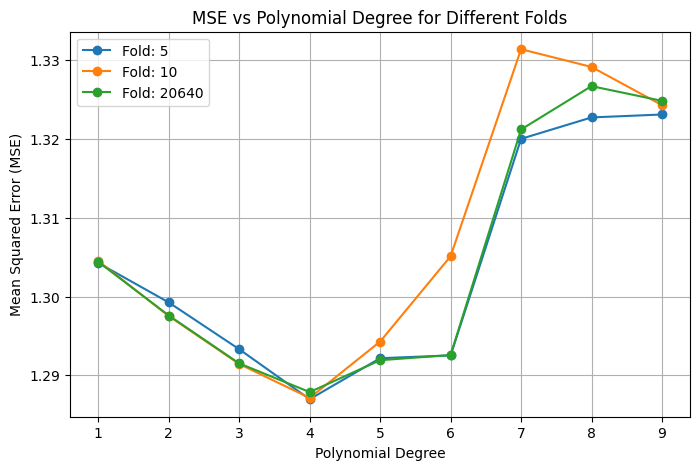

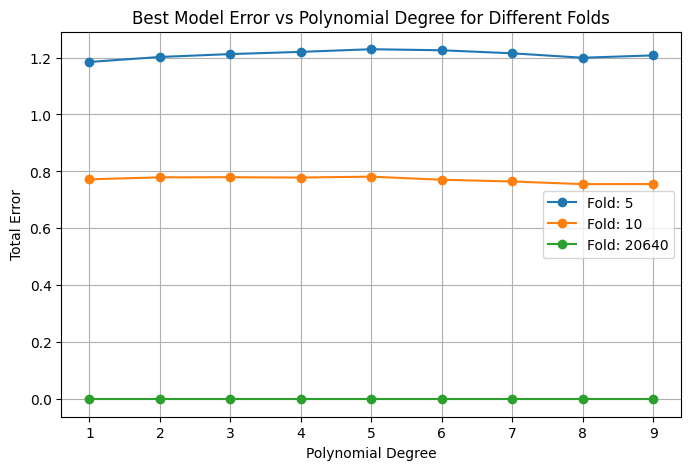

In [3]:
# A more detail testing on more degree and 3 different folding 

def polynomial_regression_test(degree, X, y, folds, test_size=0.25, random_state=None):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    variance = []
    bias2 = []
    total_error = []
    models = []

    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate variance and Bias^2 for this fold
        b2 = np.mean((np.mean(y_pred) - y_test)**2)
        var = np.mean((np.mean(y_pred) - y_pred)**2)
        total_err = b2 + var
        # Append results to lists
        variance.append(var)
        bias2.append(b2)
        total_error.append(total_err)
        models.append(model)

    # print the total_error of the best model
    min_error_index = np.argmin(total_error)
    best_model = models[min_error_index]
    print("The total error of the best model is: {:.4f}".format(total_error[min_error_index]))

    
    # Testing the final model on the test data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=42)
    # Obtain the predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_pred)

    return mse , best_model, total_error[min_error_index]


import matplotlib.pyplot as plt

# Example usage: load California Housing Dataset and select the first, third, and forth attributes as input features in X
housing = fetch_california_housing()
target = housing.target
X = housing.data[:, [1, 3, 4]]

# Set the target valiable 

degrees = range(1, 10) # for testing 
folds = [5, 10, X.shape[0]] 
fold_results = {fold: [] for fold in folds}
total_error = {fold: [] for fold in folds}

for degree in degrees:
    print("Degree: ", degree)
    for fold in folds: 
        mse, best_model, tot_err = polynomial_regression_test(degree, X, target, fold)
        fold_results[fold].append(mse)
        total_error[fold].append(tot_err)
        print("Fold:", fold, "; ", "MSE:", mse)
    print("")


plt.figure(figsize=(8, 5))
for fold in folds:
    plt.plot(degrees, fold_results[fold], marker='o', label=f'Fold: {fold}')

plt.title('MSE vs Polynomial Degree for Different Folds')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(8, 5))
for fold in folds:
    plt.plot(degrees, total_error[fold], marker='o', label=f'Fold: {fold}')

plt.title('Best Model Error vs Polynomial Degree for Different Folds')
plt.xlabel('Polynomial Degree')
plt.ylabel('Total Error')
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()




- Overall, the test proves that degree 4 will give us the lowest MSE with all different fold strategy. 
- Tests are done with three different fold strategy: 5, 10, and one on one. The results indiciate the best one is 10 fold becuase its total error is not too high or too lower at degree 4. 
- Model starts to overfit at degree 5 where the total error starts to increase significantly and continue through the rest degrees. Degrees lower than 4 indicate underfitting due to the difference between total error and MSE are large. 
- Lower polynomial degrees may underfit, while higher degrees may overfit.